In [34]:
!pip install mediapipe

In [35]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow   #구글코랩 임폴드
import numpy as np

In [36]:
file = '/content/arm.png'           #이미지 링크

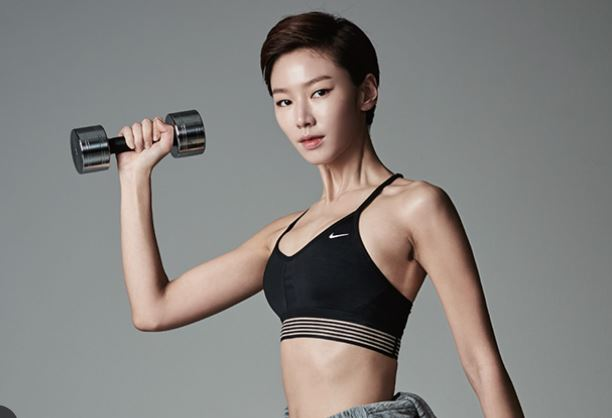

In [37]:
img = cv2.imread(file)              #이미지 읽기
cv2_imshow(img)                     #이미지 보기
img.shape                           #이미지 차원을 나타내는 튜플을 반환, 3개의 값으로 구성되있다.(높이, 너비, 채널수(컬러)),흑백이면 높이,너비만 있다.))
img_angle = np.copy(img)            #넘파이라이브러리를 사용해서 이미지를 복사, 새로운 메모리에 복제하여 새로운 배열을 생성.원본이미지를 변경하지않고,
                                    #복사본을 만들어서 사용

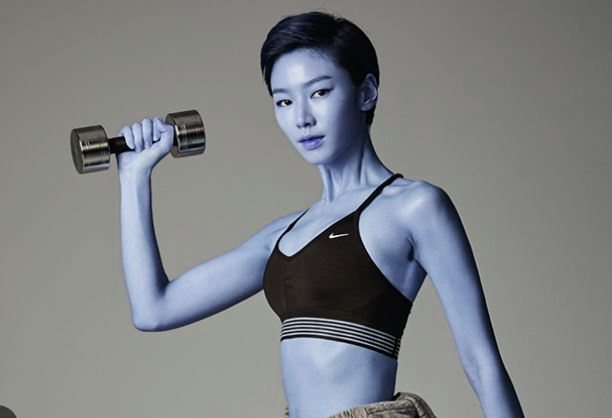

In [38]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #이미지를 BGR색공간에서 RGB색 공간으로 변환하는 코드
cv2_imshow(img_gray)    #이미지를 그레일스케일로 변환. 차원감소,많은 이미지처리및 컴퓨터 비전작업에서는 흑백이미지로 충분하며, 흑백이미지는 칼라보다
                        #채널이 줄어 높이,너비만 필요하게 되어 계산및 메모리용량을 줄일수있다. 그리고 흑백인경우 처리알고리즘이 칼라보다 간단해서 적용함

In [39]:
mp_pose = mp.solutions.pose  #pose(체형모델)미디어파이프에서 체형모델을 사용하기 위해 해당 모델을 불러오는 작업,이 pose로 사람의 머리, 어깨, 손목등의 신체부위를 감지하는데 필요한 작업
mp_drawing = mp.solutions.drawing_utils #드로잉유틸스 : 이미지나 비디오 프레임에 감지된 객체의 윤곽이나 점들을 표시,시각적으로 디버깅이나 결과보여줄때 사용

In [40]:
mp = mp_pose.Pose(static_image_mode = True, min_detection_confidence= 0.5, min_tracking_confidence=0.5)

#미디어파이프라이브러리의 pose모델을 특정한 설정으로 초기화
#스태틱이미지모드  = True pose모델을 정적이미지 모드로 사용, 이미지가 단일하고 움직이지않는포즈를 포함한다는 뜻.false면 비디오모드
#민_디텍션_컨피던스 = 0.5 감지된 포즈가 유효로 간주되기위한 신뢰도를 의미, 0.5로 설정된경우 50 %임을 의미
#민_트래킹_컨피던스 = 0.5 포즈랜드마크가 추적되는 포즈의 일부로 인식하기위한 최소 신뢰도, 추적시나리오에서 모델은 여러프레임에 걸쳐 포즈를 추적, 신뢰도 0.5이상만 사용되도록 설정

In [11]:
results = mp.process(img_gray) #이지처리,흑백이미지, 감지된 포즈에 관한 정보가 들어가게된다.

In [41]:
print(results.pose_landmarks.landmark[0])  #pos로부터 얻은 결과인 리절트에서 첫번째 랜드마크의 정보를 나타낸다.한사람의 신체부위의 특정지점을 나타내며 각 랜드마크는 3D공간에서의 위치를 갖고있다.
print(type(results.pose_landmarks.landmark[0])) #pos로부터 여러개의 랜드마크가 제공되는데,[0]번지 코 [1] 왼쪽눈등

x: 0.478385865688324
y: 0.27434206008911133
z: -0.3975726366043091
visibility: 0.9999908208847046

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmark'>


In [42]:
for lndmark in results.pose_landmarks.landmark: # 지정한 랜드마크가 포함되있는지 확인
  print(lndmark)  #visibility: 0.9999(특정랜드마크의 신뢰도, 숫자가 클수록 신리도가 높다는 것을 의미)

x: 0.478385865688324
y: 0.27434206008911133
z: -0.3975726366043091
visibility: 0.9999908208847046

x: 0.4937022030353546
y: 0.22457921504974365
z: -0.40983763337135315
visibility: 0.9999809265136719

x: 0.5099146962165833
y: 0.22072535753250122
z: -0.4097854197025299
visibility: 0.9999790191650391

x: 0.5276855826377869
y: 0.21596813201904297
z: -0.4098384380340576
visibility: 0.9999845027923584

x: 0.469320148229599
y: 0.23028433322906494
z: -0.3264220952987671
visibility: 0.9999815225601196

x: 0.4642602801322937
y: 0.2314450740814209
z: -0.3259925842285156
visibility: 0.9999750852584839

x: 0.4586467444896698
y: 0.23302435874938965
z: -0.3262110948562622
visibility: 0.9999822378158569

x: 0.5669710636138916
y: 0.22410255670547485
z: -0.36378294229507446
visibility: 0.999985933303833

x: 0.4781225919723511
y: 0.25315821170806885
z: 0.028181979432702065
visibility: 0.999975323677063

x: 0.5166298151016235
y: 0.3286859393119812
z: -0.3824525475502014
visibility: 0.9999912977218628

x: 

In [44]:
landmarks = results.pose_landmarks #만약 true이면 특정랜드마크가 포함, false면 미포함

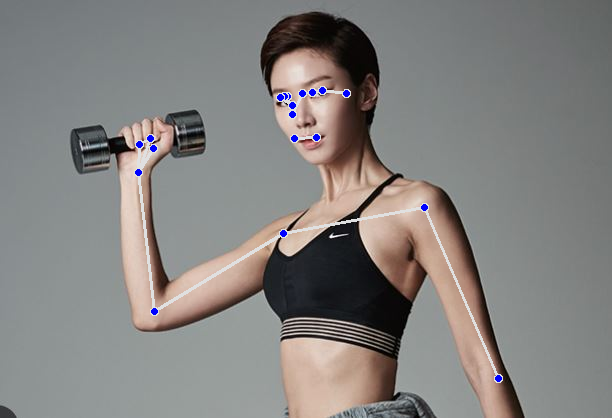

In [45]:
mp_drawing.draw_landmarks(img, landmarks, mp_pose.POSE_CONNECTIONS, #포스연결
                          mp_drawing.DrawingSpec((255,0,0), 2, 2)) #해당 랜드마크와 선을 연결, ((색상:BGR),두께, 원의 반지름)
cv2_imshow(img)

In [46]:
shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER] #오른쪽 어깨의 랜드마크정보를 가져온다
print(shoulder.x, shoulder.y)  #가져온 랜드마크의 x및y좌표를 출력한다.(범위 0~1)
shoulder_x = int(img.shape[1] * shoulder.x) #이미지의 폭에 대한 비율을 사용하여 오른쪽 어깨의 x좌표를 픽셀단위로 변환
shoulder_y = int(img.shape[0] * shoulder.y) #이미지의 높이에 대한 비율을 사용하여 오른쪽 어깨의 y좌표를 픽셀단위로 변환
shoulder_pos = [shoulder_x, shoulder_y]     #오른쪽 어깨의 x및y좌표를 포함하는 리스트를 만든다.
print(shoulder_pos)    #오른쪽 어깨의 픽셀좌표를 출력한다.


0.46379297971725464 0.558758556842804
[283, 233]


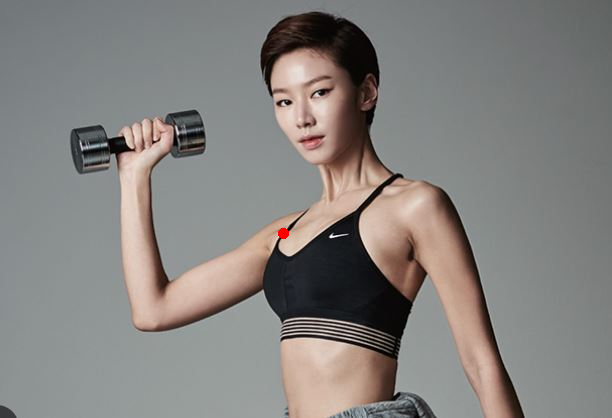

In [47]:
cv2.circle(img_angle, (shoulder_x, shoulder_y), 3, (0,0,255), 3) #어깨의x,y좌표, 3은 원의반지름, 색깔은 빨강, 원의 두께
cv2_imshow(img_angle)  #복사한 이미지 보여주기

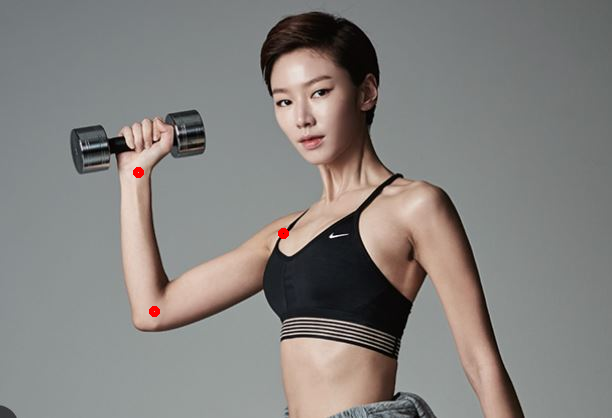

In [48]:
wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST] #오른쪽 손목의 랜드마크
wrist_x = int(img.shape[1] * wrist.x)
wrist_y = int(img.shape[0] * wrist.y)
cv2.circle(img_angle, (wrist_x, wrist_y), 3, (0,0,255), 3, -1) #해당 사진에서 빨간점을 찍고-1은 원 안을 채워줌

elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW] #오른쪽 팔꿈치의 랜드마크 가져옴
elbow_x = int(img.shape[1] * elbow.x)
elbow_y = int(img.shape[0] * elbow.y)
cv2.circle(img_angle, (elbow_x, elbow_y), 3, (0,0,255), 3, -1)

cv2_imshow(img_angle)

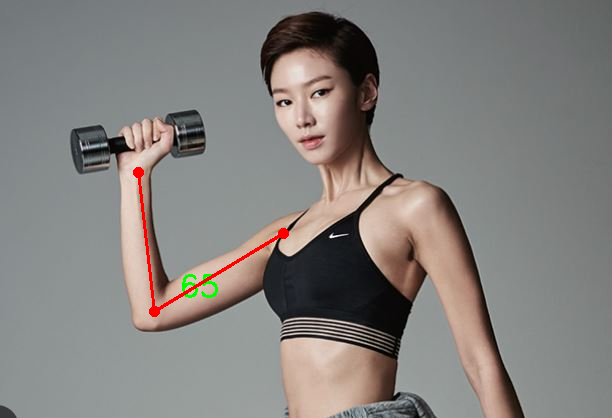

In [53]:
cv2.line(img_angle, (wrist_x, wrist_y), (elbow_x, elbow_y), (0,0,255), 2) #이미지에 선 그림,시작(손목좌표), 종료(팔꿈치좌표), 2는 선두께
cv2.line(img_angle, (shoulder_x, shoulder_y), (elbow_x, elbow_y), (0,0,255), 2)  #시작 (어깨좌표) 종료는 팔꿈치
cv2_imshow(img_angle)

In [54]:
def calculate_angle(a,b,c):  #a,b,c세점을 이용해서 이루는 각도를 계산
    a = np.array(a) # First  #각 좌표
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0]) #두개의 방향을 가지는 벡터의 바향을 사용하여 두 벡터사이의 각도를
    angle = np.abs(radians*180.0/np.pi)                          #
                                                                 #절대값으로 변환한뒤 라디안에서 도로 변환시킨다.
    if angle >180.0:
        angle = 360-angle

    return angle

In [24]:
shoulder_pos = [shoulder_x, shoulder_y] #어깨, 팔꿈치, 손목의 픽셀좌표를 리스트로 정의.
elbow_pos = [ elbow_x,  elbow_y]        #팔꿈치의 픽셀좌표를 나타내는 리스트(팔꿈치의 중심표시역할)
wrist_pos = [wrist_x, wrist_y]          #손목의 중심

In [55]:
img2 = np.copy(img_angle)
img3 = np.copy(img_angle)

65


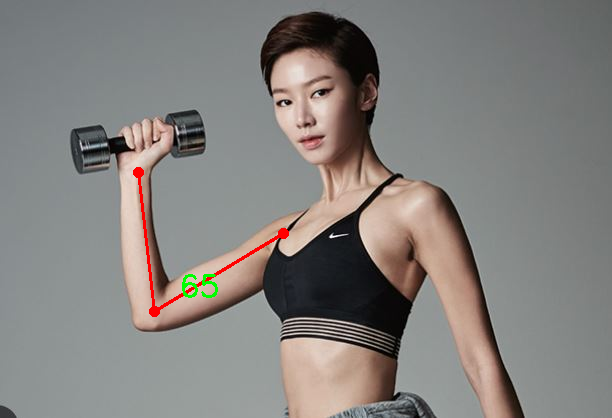

In [57]:
angle = int(calculate_angle(shoulder_pos, elbow_pos,wrist_pos )) #어깨, 팔꿈치, 손목 위치를 사용하여 각도 계산
print( angle)
cv2.putText(img_angle, str(angle), (elbow_x+25, elbow_y-15),  cv2.FONT_HERSHEY_SIMPLEX, 1,  (0, 255, 0),  2)
                                      #이미지에 각도 표시

cv2_imshow(img_angle)